In [2]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
IMAGE_SIZE=256
CHANNELS=3

# train data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True
)

train_generator=train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
)

Found 900 images belonging to 3 classes.


In [4]:
train_generator.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names=list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
# validation data
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    samplewise_center=False,
    zca_whitening=False,
    fill_mode='nearest'
)

validation_generator=validation_datagen.flow_from_directory(
    'dataset/valid',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
    
)

Found 300 images belonging to 3 classes.


In [22]:
# test data
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True
)

test_generator=test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
)

Found 300 images belonging to 3 classes.


In [16]:
INPUT_SHAPE= (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    layers.Conv2D(32 , kernel_size = (3,3), activation='swish',input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='swish'),
    layers.Dense(n_classes,activation='softmax'),
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history=model.fit(
    train_generator,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=21
)

Epoch 1/21


29/29 [==============================] - 52s 2s/step - loss: 1.0378 - accuracy: 0.4167 - val_loss: 0.6810 - val_accuracy: 0.7135
Epoch 2/21
29/29 [==============================] - 41s 1s/step - loss: 0.5905 - accuracy: 0.7333 - val_loss: 0.5512 - val_accuracy: 0.7448
Epoch 3/21
29/29 [==============================] - 41s 1s/step - loss: 0.3390 - accuracy: 0.8644 - val_loss: 0.4497 - val_accuracy: 0.8333
Epoch 4/21
29/29 [==============================] - 40s 1s/step - loss: 0.3126 - accuracy: 0.8722 - val_loss: 0.4973 - val_accuracy: 0.7917
Epoch 5/21
29/29 [==============================] - 40s 1s/step - loss: 0.2131 - accuracy: 0.9178 - val_loss: 0.3805 - val_accuracy: 0.8333
Epoch 6/21
29/29 [==============================] - 40s 1s/step - loss: 0.2092 - accuracy: 0.9244 - val_loss: 0.3012 - val_accuracy: 0.8802
Epoch 7/21
29/29 [==============================] - 41s 1s/step - loss: 0.2071 - accuracy: 0.9200 - val_loss: 0.2921 - val_accuracy: 0.8646
Epoch 8/21
29/29 [

In [23]:
scores=model.evaluate(test_generator)
scores=scores[np.argmax(scores)] *100
print("test accuracy: ",scores," %")

10/10 [==============================] - 8s 830ms/step - loss: 0.2266 - accuracy: 0.9100
test accuracy:  91.00000262260437  %


In [25]:
history.params

{'verbose': 1, 'epochs': 21, 'steps': 29}

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

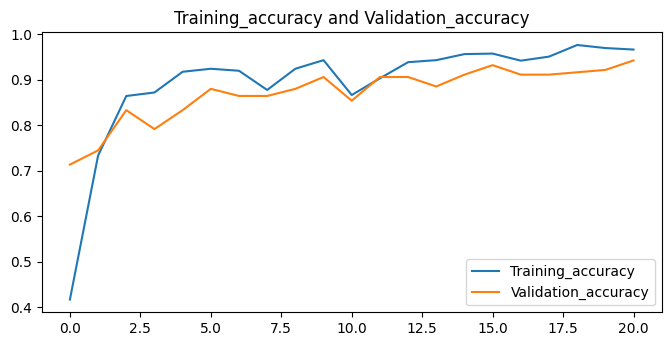

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(range(21), acc, label='Training_accuracy')
plt.plot(range(21), val_acc, label='Validation_accuracy')
plt.legend(loc='lower right')
plt.title('Training_accuracy and Validation_accuracy')
plt.savefig('graph1.png')



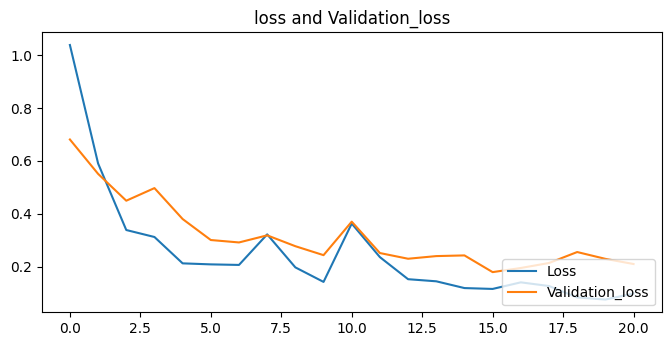

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(range(21), loss, label='Loss')
plt.plot(range(21), val_loss, label='Validation_loss')
plt.legend(loc='lower right')
plt.title('loss and Validation_loss')
plt.savefig('graph2.png')

Image to predict:


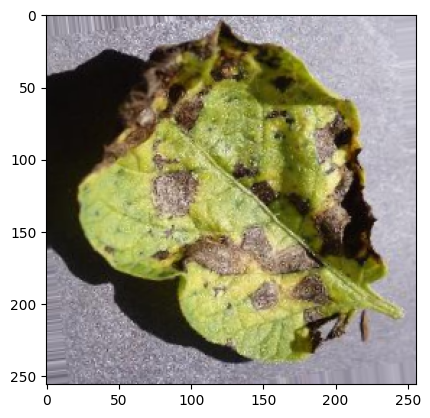

Image actual label: Potato___Early_blight
1/1 [==============================] - 1s 528ms/step
Image predicted label: Potato___Early_blight


In [29]:
# #Now we will make predictions on sample images
test_generator.reset()
images_batch , labels_batch=next(test_generator)
first_img = (images_batch[0]*255).astype('uint8')
first_label = labels_batch[0]
print('Image to predict:')
plt.imshow(first_img)
plt.show()
print('Image actual label:', class_names[int(first_label)])

batch_predictions = model.predict(images_batch)

predicted_label = np.argmax(batch_predictions[0])
print('Image predicted label:', class_names[predicted_label])

In [30]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0) #batch

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=100*(np.argmax(predictions[0]))
    return predicted_class , confidence

1/1 [==============================] - 0s 281ms/step


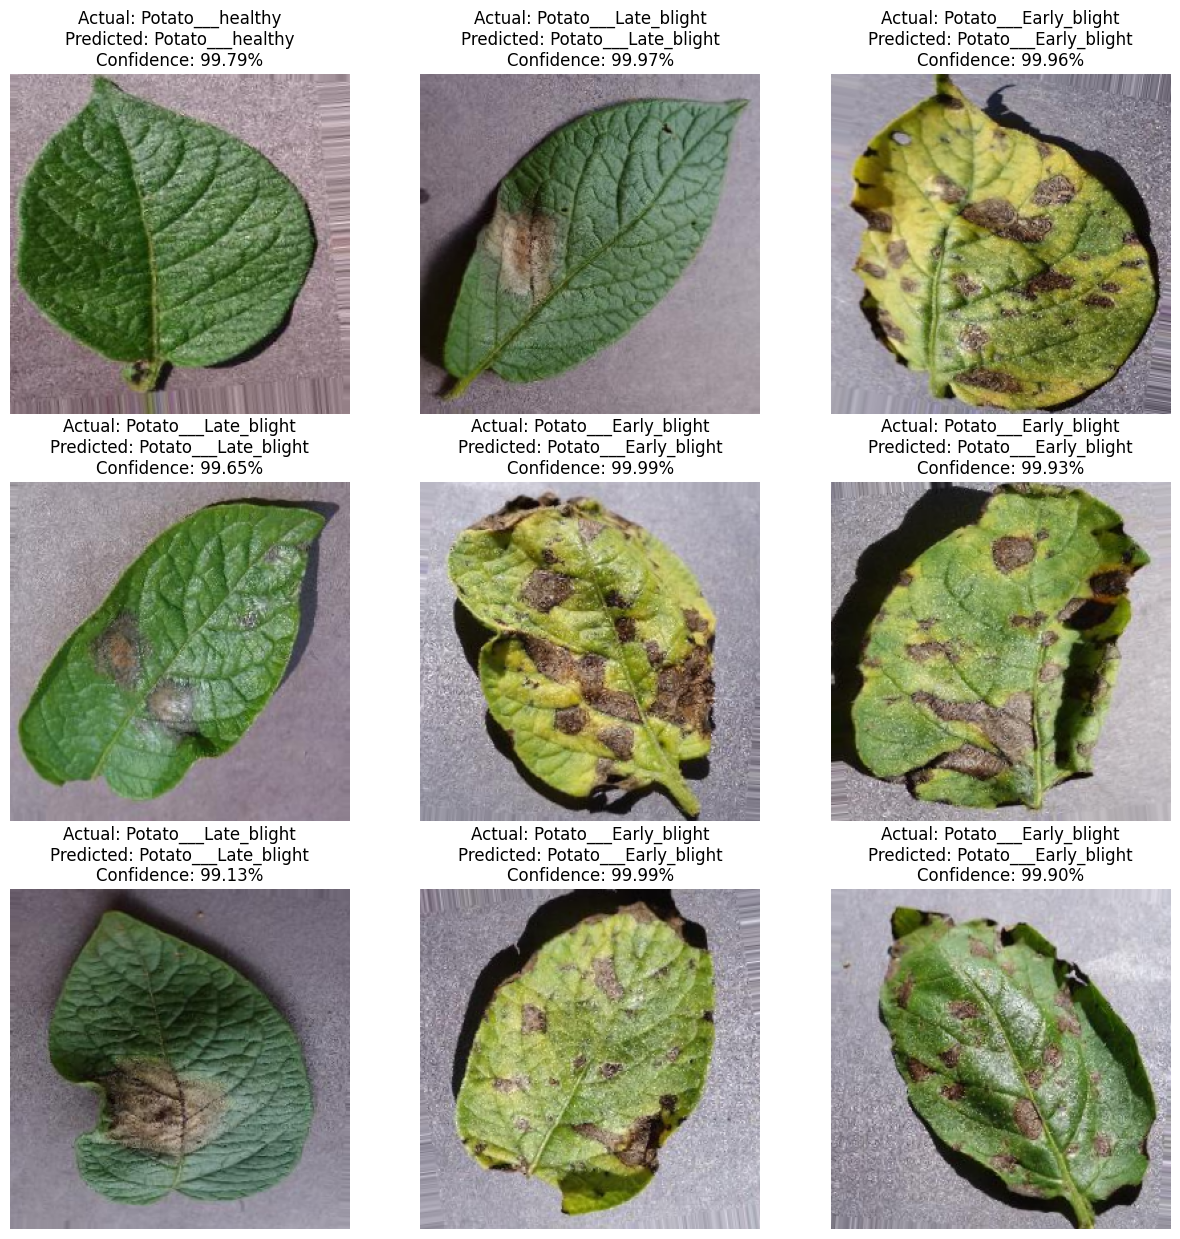

In [31]:
plt.figure(figsize=(15, 15))
images_batch, labels_batch=next(test_generator)
predictions = model.predict(images_batch)
for i in range(9):  # Assuming you want to display 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((images_batch[i]*255).astype('uint8'))

    predicted_class = class_names[np.argmax(predictions[i])]
    confidence = np.max(predictions[i]) * 100  # Convert probability to percentage
    actual_class = class_names[int(labels_batch[i])]
    
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.savefig('prediction1.png')

plt.show()



In [35]:
model.save("model.keras")

In [40]:
model.save_weights("model_weight.h5")

In [43]:
# Save the model architecture
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model.to_json())

In [44]:
import tensorflow as tf
from tensorflow.keras.activations import swish

# Assuming `model` is your trained model
model_json = model.to_json()

# Save the model architecture
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights('model_weights.h5')
